## Question 1

In [1]:
import pandas as pd

In [6]:
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user",sep='|')
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [7]:
mean_age_per_occupation = users.groupby('occupation').agg({'age': ['mean']})
mean_age_per_occupation

,age
,mean
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500


In [14]:
users['male'] = users.gender.apply(lambda x: True if x=='M' else False)
(users.groupby('occupation').male.sum() / users.groupby('occupation').gender.count()).sort_values(ascending = False).round(2)

occupation
doctor           1.00
engineer         0.97
technician       0.96
retired          0.93
programmer       0.91
executive        0.91
scientist        0.90
entertainment    0.89
lawyer           0.83
salesman         0.75
educator         0.73
student          0.69
other            0.66
marketing        0.62
writer           0.58
none             0.56
administrator    0.54
artist           0.54
librarian        0.43
healthcare       0.31
homemaker        0.14
dtype: float64

In [12]:
result_1 = users.groupby('occupation').agg({'age': ['min','max']})
result_1

age    
              min max
occupation           
administrator  21  70
artist         19  48
doctor         28  64
educator       23  63
engineer       22  70
entertainment  15  50
executive      22  69
healthcare     22  62
homemaker      20  50
lawyer         21  53
librarian      23  69
marketing      24  55
none           11  55
other          13  64
programmer     20  63
retired        51  73
salesman       18  66
scientist      23  55
student         7  42
technician     21  55
writer         18  60

In [17]:
result_2 = users.groupby(['occupation','gender']).agg({'age': ['mean']})
result_2

age
                           mean
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

In [23]:
df = (users.groupby('occupation')['gender'].value_counts(normalize=True).reset_index(name='perc'))
df

,occupation,gender,perc
0,administrator,M,0.544304
1,administrator,F,0.455696
2,artist,M,0.535714
3,artist,F,0.464286
4,doctor,M,1.000000
5,educator,M,0.726316
6,educator,F,0.273684
7,engineer,M,0.970149
8,engineer,F,0.029851
9,entertainment,M,0.888889


## Question 2

In [17]:
euro12 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [21]:
goals = euro12['Goals']
goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [25]:
teams_count = euro12['Team'].count()
teams_count

16

In [26]:
len(euro12.columns)

35

In [28]:
discipline = euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [31]:
sorted_values = discipline.sort_values(['Red Cards','Yellow Cards'])
sorted_values

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [30]:
mean_yellow_cards = discipline.groupby('Team').agg({'Yellow Cards': ['mean']})
mean_yellow_cards

,Yellow Cards
,mean
Team,
Croatia,9
Czech Republic,7
Denmark,4
England,5
France,6
Germany,4
Greece,9
Italy,16


In [35]:
goals_per_team = euro12[['Team','Goals']]
greater_goals = goals_per_team[goals_per_team['Goals']  > 6]
greater_goals

,Team,Goals
5,Germany,10
13,Spain,12


In [38]:
Teams_names = euro12['Team']
new_val = Teams_names[Teams_names.str.startswith("G")]
new_val

5    Germany
6     Greece
Name: Team, dtype: object

In [28]:
euro12.iloc[:, list(range(7))]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,0.519,0.160,32
1,Czech Republic,4,13,18,0.419,0.129,39
2,Denmark,4,10,10,0.500,0.200,27
3,England,5,11,18,0.500,0.172,40
4,France,3,22,24,0.379,0.065,65
5,Germany,10,32,32,0.478,0.156,80
6,Greece,5,8,18,0.307,0.192,32
7,Italy,6,34,45,0.430,0.075,110
8,Netherlands,2,12,36,0.250,0.041,60
9,Poland,2,15,23,0.394,0.052,48


In [34]:
euro12.iloc[:, list(range(32))]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,0.519,0.160,32,0,0,0,...,0,10,3,13,0.813,41,62,2,9,0
1,Czech Republic,4,13,18,0.419,0.129,39,0,0,0,...,1,10,6,9,0.601,53,73,8,7,0
2,Denmark,4,10,10,0.500,0.200,27,1,0,0,...,1,10,5,10,0.667,25,38,8,4,0
3,England,5,11,18,0.500,0.172,40,0,0,0,...,2,29,3,22,0.881,43,45,6,5,0
4,France,3,22,24,0.379,0.065,65,1,0,0,...,1,7,5,6,0.546,36,51,5,6,0
5,Germany,10,32,32,0.478,0.156,80,2,1,0,...,1,11,6,10,0.626,63,49,12,4,0
6,Greece,5,8,18,0.307,0.192,32,1,1,1,...,1,23,7,13,0.651,67,48,12,9,1
7,Italy,6,34,45,0.430,0.075,110,2,0,0,...,2,18,7,20,0.741,101,89,16,16,0
8,Netherlands,2,12,36,0.250,0.041,60,2,0,0,...,0,9,5,12,0.706,35,30,3,5,0
9,Poland,2,15,23,0.394,0.052,48,0,0,0,...,0,8,3,6,0.667,48,56,3,7,1


In [45]:
shooting_accuracy = euro12[['Team','Shooting Accuracy']]
val = shooting_accuracy.loc[shooting_accuracy.Team.isin(['England','Italy','Russia'])]
val

,Team,Shooting Accuracy
3,England,0.500
7,Italy,0.430
12,Russia,0.225


## Question 3

In [16]:
import random

In [26]:
col1,col2,col3 = [],[],[]

for i in range(0,100):
    n1 = random.randint(1,4)
    col1.append(n1)
    n2 = random.randint(1,3)
    col2.append(n2)
    n3 = random.randint(10000,30000)
    col3.append(n3)

data = {'Col1' : col1,'Col2':col2,'Col3':col3}
df = pd.DataFrame(data)
df.head()

,Col1,Col2,Col3
0,2,3,17946
1,2,3,22448
2,4,3,28005
3,2,1,21415
4,3,3,13050


In [27]:
df.rename(columns = {'Col1': 'bedrs', 'Col2': 'bathrs','Col3':'price_sqr_meter'}, inplace = True)
df.head()

,bedrs,bathrs,price_sqr_meter
0,2,3,17946
1,2,3,22448
2,4,3,28005
3,2,1,21415
4,3,3,13050


#### The below code returned error as expected.

In [21]:
total_col = col1+col2+col3
df['bigcolumn'] = total_col
df

ValueError: Length of values (300) does not match length of index (100)

In [28]:
col_1,col_2,col_3 = [],[],[]

for i in range(0,300):
    n1 = random.randint(1,4)
    col_1.append(n1)
    n2 = random.randint(1,3)
    col_2.append(n2)
    n3 = random.randint(10000,30000)
    col_3.append(n3)

data = {'bedrs' : col_1,'bathrs':col_2,'price_sqr_meter':col_3}
df = pd.DataFrame(data)
df.head()

,bedrs,bathrs,price_sqr_meter
0,1,1,20429
1,3,1,15857
2,4,3,28324
3,1,2,27513
4,1,2,19280


In [29]:
total_col = col1+col2+col3
df['bigcolumn'] = total_col
df

,bedrs,bathrs,price_sqr_meter,bigcolumn
0,1,1,20429,2
1,3,1,15857,2
2,4,3,28324,4
3,1,2,27513,2
4,1,2,19280,3
...,...,...,...,...
295,4,2,28755,16382
296,4,1,29369,27045
297,2,3,19351,18025
298,4,3,22755,10909


## Question 4

In [49]:
data = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data", sep='\s+')
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [50]:
data["DateTime"] = pd.to_datetime(
    data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1)
)

In [52]:
data = data.drop(columns=["Yr","Mo","Dy"])

In [53]:
data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,DateTime
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05


In [54]:
data_new = data.set_index("DateTime")
data_new.index.astype("datetime64[ns]")

DatetimeIndex(['2061-01-01', '2061-01-02', '2061-01-03', '2061-01-04',
               '2061-01-05', '2061-01-06', '2061-01-07', '2061-01-08',
               '2061-01-09', '2061-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='DateTime', length=6574, freq=None)

In [55]:
data_new.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
DateTime,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


## Question 5

In [57]:
chipo = pd.read_table("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv")
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [62]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [59]:
len(chipo.columns)

5

In [61]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [63]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [64]:
chipo['item_name'].value_counts()[:1]

Chicken Bowl    726
Name: item_name, dtype: int64

In [65]:
chipo['choice_description'].value_counts()[:1]

[Diet Coke]    134
Name: choice_description, dtype: int64

In [51]:
chipo['item_name'].value_counts().sum()

4622

In [52]:
chipo.astype({'item_price': 'float'}).dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [53]:
chipo['item_price'].sum()

34500.16

In [67]:
chipo['order_id'].max()

1834

In [55]:
chipo.groupby('order_id').agg({'item_price': ['mean']})

,item_price
,mean
order_id,
1,2.890000
2,16.980000
3,6.335000
4,10.500000
5,6.850000
...,...
1830,11.500000
1831,4.300000


In [66]:
new_list = chipo['item_name'].tolist()
new_set = set(new_list)
len(new_set)

50

## Question 6 

In [73]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
us_mar_div = pd.read_csv("C:\\BDAT\\Data Programming\\Assignment_3\\us_mar_div.csv")
us_mar_div.sort_values('Year')

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


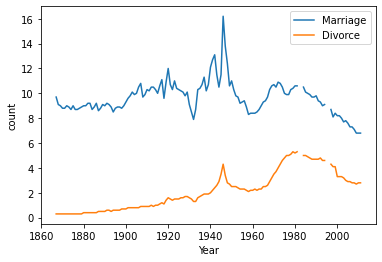

In [90]:
year = us_mar_div['Year'].tolist()
mar = us_mar_div['Marriages_per_1000'].tolist()
div = us_mar_div['Divorces_per_1000'].tolist()

df = pd.DataFrame({
   'Marriage': mar,
   'Divorce': div
   }, index=year)

lines = df.plot.line(xlabel='Year', ylabel='count')


## Question 7 

In [77]:
df_selected = us_mar_div[['Year','Marriages_per_1000','Divorces_per_1000']]
val = df_selected.loc[df_selected.Year.isin([1900,1950,2000])]
val

,Year,Marriages_per_1000,Divorces_per_1000
33,1900,9.3,0.7
83,1950,11.0,2.5
133,2000,8.2,3.3


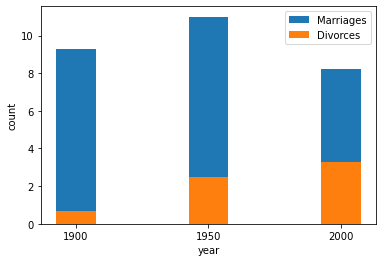

In [92]:
Year = val['Year'].tolist()
Year_str = []
for x in Year:
    Year_str.append(str(x))

Marriages = val['Marriages_per_1000'].tolist()
Divorces = val['Divorces_per_1000'].tolist()

plt.bar(Year_str,Marriages,0.3,label="Marriages")
plt.bar(Year_str,Divorces,0.3,label="Divorces")
       
plt.xlabel("year")
plt.ylabel("count")
plt.legend()
plt.show()

## Question 8

In [77]:
kill_counts = pd.read_csv("C:\\BDAT\\Data Programming\\Assignment_3\\actor_kill_counts.csv")
kill_counts_sorted = kill_counts.sort_values('Count',ascending = False)
kill_counts_sorted

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
7,Sylvester Stallone,267
4,Dolph Lundgren,239
8,Tomisaburo Wakayama,226
2,Clint Eastwood,207
6,Nicolas Cage,204
5,Jet Li,201
3,Clive Owen,194
9,Wesley Snipes,193


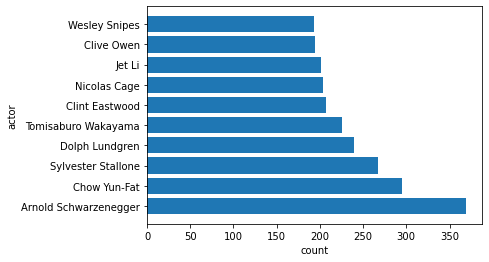

In [79]:
plt.barh(kill_counts_sorted['Actor'],kill_counts_sorted['Count'])
plt.xlabel('count')
plt.ylabel('actor')
plt.show()


## Question 9

In [93]:
roman_regime = pd.read_csv("C:\\BDAT\\Data Programming\\Assignment_3\\roman-emperor-reigns.csv")
roman_regime.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


In [96]:
cause_of_death = roman_regime['Cause_of_Death'].value_counts()
cause_of_death

Assassinated             22
Natural causes           16
Possibly assassinated     8
Killed in battle          8
Illness                   5
Suicide                   5
Executed                  3
Died in captivity         1
Name: Cause_of_Death, dtype: int64

<AxesSubplot:ylabel='Cause_of_Death'>

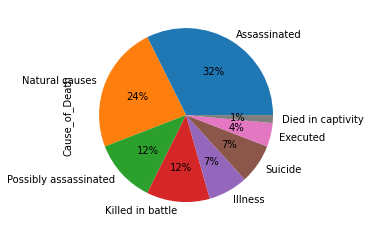

In [99]:
cause_of_death.plot(kind='pie',autopct='%1.0f%%')

## Question 10

In [100]:
arcade_revenue = pd.read_csv("C:\\BDAT\\Data Programming\\Assignment_3\\arcade-revenue-vs-cs-doctorates.csv")
arcade_revenue

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


<AxesSubplot:xlabel='Computer Science Doctorates Awarded (US)', ylabel='Total Arcade Revenue (billions)'>

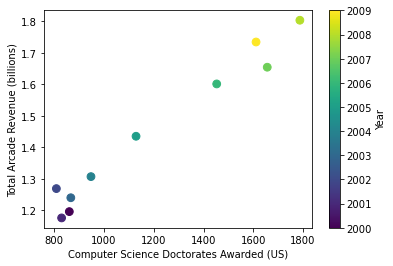

In [108]:
fig, ax = plt.subplots()
arcade_revenue.plot.scatter(x = 'Computer Science Doctorates Awarded (US)', y = 'Total Arcade Revenue (billions)',s=60,c = 'Year',colormap='viridis',ax=ax)